In [31]:
%matplotlib inline
import numpy as np # n-dimensional array object & math functions
import pandas as pd # load data into dataframe
import matplotlib.pyplot as plt # basic plots
import seaborn as sns # advanced statistical plots

In [32]:
df = pd.read_csv("HW2_Housing Survey.csv")

In [33]:
df

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,...,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
0,H,186,8,700,4,16,1015675,89,4,1,...,81,27,93,151,28,79,25,101,157,129
1,H,306,8,700,4,16,1015675,310,1,1,...,292,401,81,494,346,496,615,286,454,260
2,H,395,8,100,4,16,1015675,106,2,1,...,123,119,168,107,95,101,30,124,106,31
3,H,506,8,700,4,16,1015675,240,4,1,...,68,359,385,71,234,421,76,77,242,231
4,H,835,8,800,4,16,1015675,118,4,1,...,127,36,119,121,116,209,97,176,144,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,H,1357238,8,300,4,16,1015675,108,2,1,...,198,88,112,26,64,106,142,106,33,111
6492,H,1357340,8,400,4,16,1015675,58,2,1,...,66,101,62,52,105,75,20,127,105,68
6493,H,1357874,8,900,4,16,1015675,32,2,1,...,7,8,12,37,44,36,28,33,48,59
6494,H,1357880,8,500,4,16,1015675,123,2,1,...,201,123,38,104,186,203,132,118,201,125


In [34]:
#  1 VAL
len(df[df["VAL"] == 24])

53

In [35]:
na_count = df["VAL"].isna().sum()
VAL_count = len(df["VAL"]) - na_count
na_count, VAL_count

(2076, 4420)

In [36]:
str(len(df[df["VAL"] == 24])/VAL_count*100) + "%"

'1.1990950226244346%'

In [37]:
# 2 NP
df['NP'].mean()
# sum(df['NP'])/len(df['NP'])

2.2984913793103448

<AxesSubplot: xlabel='NP', ylabel='VAL'>

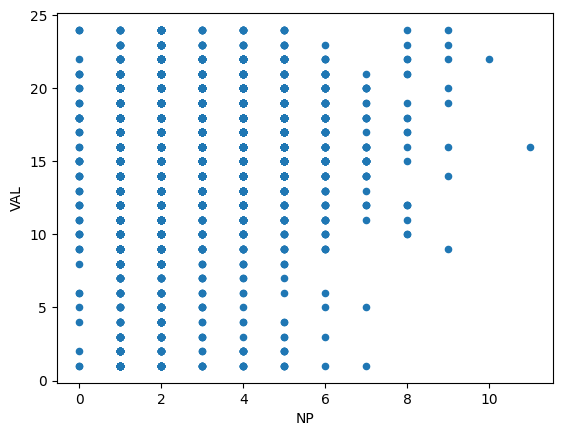

In [38]:
# 3 NP vs VAL
df.plot(x="NP", y="VAL", kind="scatter")

In [39]:
max_NP = df['NP'].max()
min_NP = df['NP'].min()

In [40]:
NP_array = [NP for NP in range(min_NP, max_NP+1)]
VAL_average_array = [df[df['NP'] == NP]['VAL'].mean() for NP in NP_array]

<AxesSubplot: xlabel='NP', ylabel='AVG Val'>

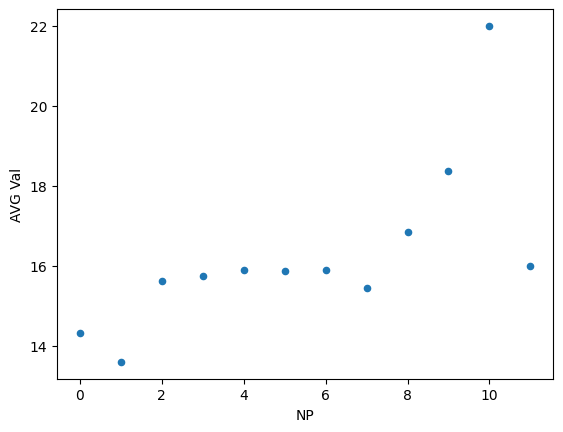

In [41]:
df2 = pd.DataFrame({"NP":NP_array, "AVG Val":VAL_average_array})
df2.plot(x = "NP", y = "AVG Val", kind="scatter")

In [42]:
val_array = [i+1 for i in range(24)]
NP_average_array = [df[df['VAL'] == val]['NP'].mean() for val in val_array]

<AxesSubplot: xlabel='AVG NP', ylabel='Val'>

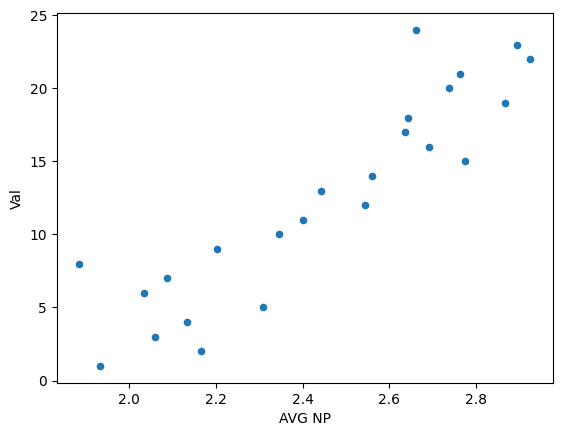

In [43]:
df2 = pd.DataFrame({"AVG NP":NP_average_array, "Val":val_array})
df2.plot(x = "AVG NP", y = "Val", kind="scatter")

<AxesSubplot: xlabel='FINCP', ylabel='Count'>

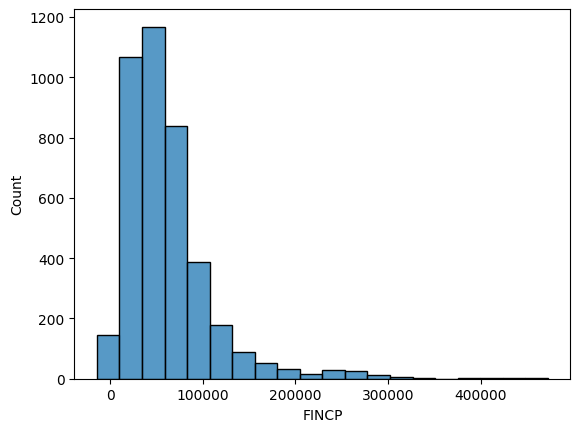

In [44]:
# 4 FINCP
sns.histplot(df['FINCP'],bins=20)

In [45]:
minFINCP = df['FINCP'].min()

<AxesSubplot: xlabel='Normalized FINCP', ylabel='Count'>

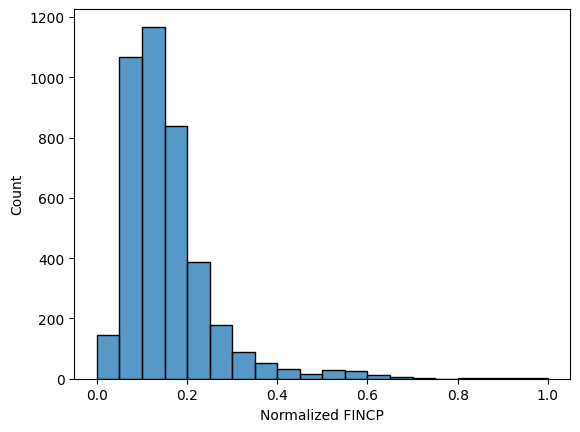

In [46]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
Scaled_FINCP = scaler.fit_transform((df['FINCP']-minFINCP).values.reshape(-1, 1))
df3 = pd.DataFrame({"Normalized FINCP": [row[0] for row in Scaled_FINCP]})
sns.histplot(df3["Normalized FINCP"], bins=20)

<AxesSubplot: xlabel='FINCP', ylabel='Count'>

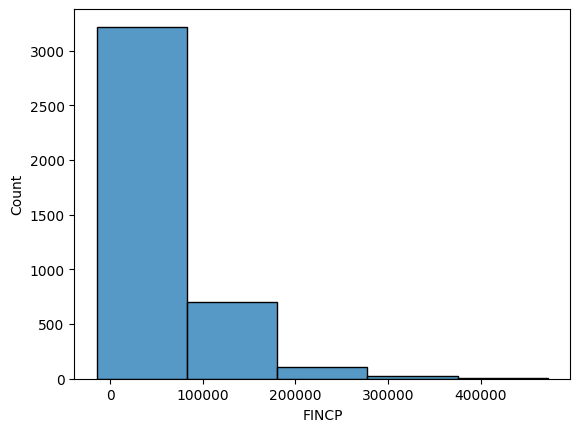

In [47]:
# 5 FINCP
sns.histplot(df['FINCP'], bins=5)

<AxesSubplot: xlabel='Normalized FINCP', ylabel='Count'>

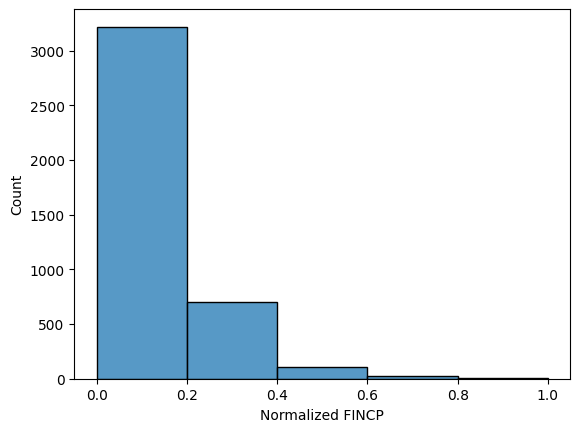

In [48]:
sns.histplot(df3["Normalized FINCP"], bins=5)